<p align="center"><font size="6"><b>Notebook de Charles-Henri SAINT-MARS</b></font></p>

# **Les statistiques descriptives et inférentielles**

In [2]:
# importation des modules
import numpy as np
import statistics as stats
import scipy.stats as scs
import matplotlib.pyplot as plt
import seaborn as sns

## Statistiques descriptives : Moyenne, médiane, variance et écart-type

### Tableau de valeurs

In [3]:
np.random.seed(1)
data = np.random.uniform(low=-5, high=5, size=101) # 101 valeurs aléatoires entre -5 et 5
data

array([-0.82977995,  2.20324493, -4.99885625, -1.97667427, -3.53244109,
       -4.07661405, -3.13739789, -1.54439273, -1.03232526,  0.38816734,
       -0.80805486,  1.852195  , -2.9554775 ,  3.78117436, -4.72612407,
        1.7046751 , -0.82695198,  0.58689828, -3.59613061, -3.01898511,
        3.00744569,  4.68261576, -1.86575822,  1.92322616,  3.76389152,
        3.94606664, -4.14955789, -4.60945217, -3.3016958 ,  3.78142503,
       -4.01653166, -0.78892375,  4.5788953 ,  0.33165285,  1.91877114,
       -1.84484369,  1.86500928,  3.34625672, -4.81711723,  2.50144315,
        4.88861089,  2.48165654, -2.19556008,  2.89279328, -3.96773993,
       -0.52106474,  4.08595503, -2.06385852, -2.12224661, -3.69971428,
       -4.80633042,  1.78835533, -2.88371884, -2.34453341, -0.08426841,
       -4.46637455,  0.74117605, -3.53271425,  0.89305537,  1.9975836 ,
       -3.97665571, -0.85944012,  1.94400158, -0.8582073 , -4.50046541,
        0.35896406,  1.63794645,  0.14889112,  4.44594756,  0.86

### Moyenne

La moyenne est la somme de toutes les valeurs divisée par le nombre total de valeurs.

In [4]:
# Moyenne
nombre_valeurs = len(data)
print("Nombre de valeurs : ", nombre_valeurs)
somme_valeurs = data.sum()
print("Somme des valeurs : ", somme_valeurs)
moyenne = somme_valeurs / nombre_valeurs
print("Moyenne sans numpy : ", moyenne)
print("Moyenne avec numpy : ", np.mean(data)) # ou data.mean()

Nombre de valeurs :  101
Somme des valeurs :  -15.855623382133416
Moyenne sans numpy :  -0.15698637012013283
Moyenne avec numpy :  -0.15698637012013283


### Mediane

La médiane est la valeur qui sépare la moitié supérieure de la moitié inférieure d'un ensemble de données. C'est une mesure de position centrale. Elle est moins sensible aux valeurs extrêmes que la moyenne. Pour trouver la médiane, les données doivent être triées par ordre croissant. Si le nombre de données est impair, la médiane est la valeur du milieu. Si le nombre de données est pair, la médiane est la moyenne des deux valeurs du milieu. Au moins 50% des valeurs sont inférieures ou égales à la médiane. <br>
La médiane est souvent utilisée comme une meilleure mesure de la "valeur typique" que la moyenne, surtout lorsque les données sont fortement asymétriques.

In [5]:
data.sort() # tri des valeurs en ordre croissant pour calculer la médiane 
print("Médiane sans numpy : ", data[50])
print("Médiane avec numpy : ", np.median(data))

Médiane sans numpy :  -0.5008786652005952
Médiane avec numpy :  -0.5008786652005952


In [6]:
# Remarque : tri en ordre décroissant d'un ndarray
data2 = np.array([12,2,5,14,8,7,9,3,15,6,11,4,10,13,1])
data2 = np.sort(data2)[::-1]
print(data2)

[15 14 13 12 11 10  9  8  7  6  5  4  3  2  1]


In [7]:
# Créer un tableau NumPy à trier en ordre décroissant
tableau = np.array([3, 1, 4, 1, 5, 9, 2, 6])

# Obtenir les indices triés en ordre décroissant
indices_trie = np.argsort(tableau)[::-1]
print("Indices du tri", indices_trie)

# Appliquer ces indices au tableau d'origine
tableau_trie = tableau[indices_trie] # tri en ordre décroissant

print(tableau_trie)

Indices du tri [5 7 4 2 0 6 3 1]
[9 6 5 4 3 2 1 1]


In [8]:
bank_accounts = np.array([1000, 2000, 100000000, 5000, 100000000000])

In [9]:
np.median(bank_accounts) # médiane

5000.0

### Mode

Le mode est la valeur qui apparaît le plus souvent dans un ensemble de données. Il est possible d'avoir plusieurs modes (ensemble de données bimodal) ou aucun mode (ensemble de données uniforme). Le mode est souvent utilisé pour les données qualitatives.

In [10]:
# Calcul du mode
print("Mode avec statistics : ", stats.mode(data))

mode = scs.mode(data)
print("Mode avec scipy : ", mode[0])

Mode avec statistics :  -4.998856251826551
Mode avec scipy :  -4.998856251826551


### Variance

La variance est une mesure de la dispersion des valeurs d'un ensemble de données. Elle est calculée en prenant la moyenne des carrés des écarts par rapport à la moyenne. Une variance élevée indique que les valeurs sont très dispersées, tandis qu'une variance faible indique que les valeurs sont regroupées autour de la moyenne. `La variance est en unités au carré. Pour obtenir une mesure de dispersion dans les mêmes unités que les données, on utilise l'écart-type`.

In [11]:
moyenne = np.mean(data) 
variance = ((data - moyenne) ** 2).sum() / nombre_valeurs
print("Variance sans numpy : ", variance)
print("Variance avec numpy : ", np.var(data)) # ou data.var()

Variance sans numpy :  8.606269185573993
Variance avec numpy :  8.606269185573993


### Ecart-type (σ)

L'écart-type est la racine carrée de la variance. Il est souvent utilisé pour mesurer la dispersion des valeurs autour de la moyenne. L'écart-type est en unités de données. Plus l'écart-type est grand, plus les valeurs sont dispersées autour de la moyenne.<br
Quelques propriétés de l'écart-type :
- L'écart-type est toujours positif.
- Si toutes les valeurs d'un ensemble de données sont multipliées par un facteur constant, l'écart-type est également multiplié par ce facteur.
- L'écart-type est nul si et seulement si toutes les valeurs d'un ensemble de données sont égales.

In [12]:
ecart_type = np.sqrt(variance)
print("Ecart-type sans numpy : ", ecart_type)
print("Ecart-type avec numpy : ", np.std(data)) # ou data.std()

Ecart-type sans numpy :  2.9336443522646016
Ecart-type avec numpy :  2.9336443522646016


## Statistiques inférentielles : Corolaire de l'inégalité de Tchebychev et loi normale

### Coloraire de l'inégalité de Tchebychev

- Pour une distribution dite normale, environ `68,27%` des valeurs se situent à moins `d'un écart-type (1σ)`  de la moyenne, `95,45%` à moins de `deux écarts-types (2σ)` de la moyenne et `99,73%` à moins de `trois écarts-types (3σ)` de la moyenne. C'est ce qu'on appelle la `règle empirique` à savoir `68-95-99.7`.
- Plus généralement, quelque soit la distribution, `l'inégalité de Tchebychev` permet de dire qu'`au moins 75% des données` se situent `dans un intervalle de deux écarts-types (2𝜎)`  autour de la moyenne et qu'`au moins 88,9% des données` se situent `dans un intervalle de trois écarts-types (3𝜎)` autour de la moyenne.

### Loi Normale (ou distribution gaussienne)

La loi normale est une distribution de probabilité continue qui est symétrique et **en forme de cloche**. Elle est caractérisée par sa moyenne et son écart-type. La loi normale est également appelée distribution gaussienne en l'honneur du mathématicien Carl Friedrich Gauss. La loi normale est importante en statistique car de nombreux phénomènes naturels et mesures humaines suivent une distribution normale. La loi normale est également importante en raison de la `règle empirique` qui stipule que `68,27%` des valeurs se situent à moins d'un écart-type `(1σ)` de la moyenne, `95,45%` à moins de deux écarts-types `(2σ)` de la moyenne et `99,73%` à moins de trois écarts-types `(3σ)` de la moyenne.

- La moyenne d'une distribution normale est de 0
- La variance d'une distribution normale est de 1
- L'écart-type d'une distribution normale est de 1


In [13]:
#normal_data = np.random.normal(loc=0, scale=1, size=100)
normal_data = np.random.randn(1000)
normal_data

array([ 1.01037548e+00,  7.08366439e-02,  7.17589826e-01, -2.50704910e-01,
       -5.15299278e-02,  1.31289070e-02,  2.02239055e-01,  4.54952242e-01,
       -3.99268172e-01,  1.81067417e-01,  8.07487950e-01,  8.12535189e-01,
        2.10902031e-01,  4.21779155e-01,  5.81925184e-01, -4.10207518e-01,
        2.29686610e+00,  1.68849705e+00,  6.25811471e-01, -1.61136381e+00,
        6.00977379e-02,  4.62420790e-01,  6.84836490e-01, -5.95460330e-01,
        9.99051240e-01, -3.08170741e-01,  3.65838343e-01,  1.60750704e+00,
       -2.38177368e-01, -3.40828283e-01,  4.87594206e-01,  1.73907303e+00,
        6.89698049e-02,  4.73241391e-01, -6.50355022e-01, -7.79106955e-01,
       -7.77662709e-01,  6.22562797e-01,  4.27562074e-01,  7.40096006e-02,
       -4.53168603e-01,  6.04153641e-01,  2.38520581e+00, -1.23883329e-01,
       -3.24193673e-01,  3.10754231e-01,  2.46162831e+00, -3.16123687e-01,
       -1.81506277e+00,  6.84249500e-01,  3.20325282e-02,  1.96270208e-01,
        9.07451161e-01, -

<Axes: ylabel='Count'>

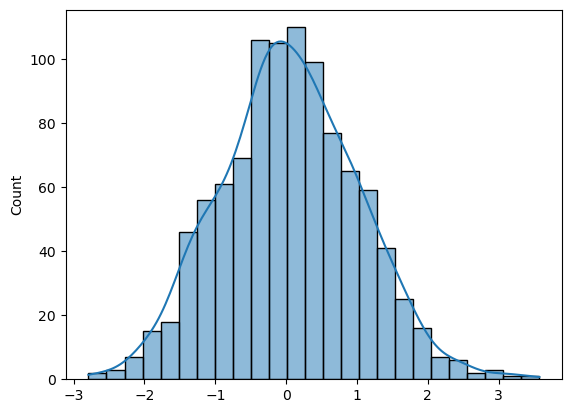

In [14]:
sns.histplot(normal_data, kde=True)